## Text Mining in R

To be able to run the code in this tutorial and complete your HW/lab assignments, you need to install and library the following packages: 
- **quanteda**
- **quanteda.textplots**:

In [3]:
install.packages("quanteda")
library(quanteda)

install.packages("quanteda.textplots")
library(quanteda.textplots)

also installing the dependencies ‘ISOcodes’, ‘fastmatch’, ‘RcppParallel’, ‘SnowballC’, ‘stopwords’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Package version: 3.0.0
Unicode version: 13.0
ICU version: 67.1

Parallel computing: 32 of 32 threads used.

See https://quanteda.io for tutorials and examples.

also installing the dependencies ‘coda’, ‘rle’, ‘extrafontdb’, ‘Rttf2pt1’, ‘statnet.common’, ‘extrafont’, ‘ggrepel’, ‘sna’, ‘igraph’, ‘network’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



**HW 11** focuses on real-life data collected right here in Syracuse, NY! Here is an article which describes the data and the person behind it: https://samedelstein.medium.com/snowplow-naming-contest-data-2dcd38272caf <br>

In this tutorial, we will explore a **subset of your HW data** to demonstrate the techniques needed to complete your assignment. Therefore, in the course of working on your homework, you may notice that the results slightly differ from what you see here, and that's okay - remember that we are only using part of the data in this demo. Nevertheless, the same logic, i.e. the same commands, will apply to HW 11. <br> 

As usual, our first step is to load the data into R by saving it to a dataframe with the **read_csv()** command from **tidyverse**. Let's call the dataframe **df**. Here is the link to the data: https://ist387.s3.us-east-2.amazonaws.com/data/snowplownamesSmall.csv


In [1]:
library(tidyverse)
url="https://ist387.s3.us-east-2.amazonaws.com/data/snowplownamesSmall.csv"
df <- read_csv(url)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  submission_number = col_double(),
  submitter_name_anonymized = col_character(),
  snowplow_name = col_character(),
  meaning = col_character(),
  winning_name = col_logical()
)




Let's see what we have with the **head()**, or **View()** command:

In [2]:
head(df)

submission_number,submitter_name_anonymized,snowplow_name,meaning,winning_name
<dbl>,<chr>,<chr>,<chr>,<lgl>
1,kjlt9cua,rudolph,The red nose cuts through any storm.,FALSE
2,KXKaabXN,salt life,"We may not be near the ocean like everyone else with the stickers that say Salt Life, but we have plenty of salt!",FALSE
3,kjlt9cua,blizzard,This plow can handle any storm.,FALSE
4,Rv9sODqp,butter,It's amazing how the snow plows through snow like butter!,FALSE
5,zzcc5FDn,santa's 10 reindeer,They can deliver through the bad weather and snow.,FALSE
6,wOrKO7XI,plowy mcplowface,It would be a great name,FALSE


For the text analysis, we will focus on the column in **df** which contains an explanation of the **meaning** behind each proposed name - **df$meaning**. <br>
To analyze the text data in this column, we first need to transform it into a **document-feature matrix**, using the **corpus()** and **dfm()** functions, and **remove stop words** along the way as a form of **preprocessing**:

In [4]:
corp <- corpus(df$meaning)
DFM <- dfm(corp, remove_punct=TRUE, remove=stopwords("english"))

Warning message:
“NA is replaced by empty string”
Warning message:
“'dfm.corpus()' is deprecated. Use 'tokens()' first.”
Warning message:
“'...' should not be used for tokens() arguments; use 'tokens()' first.”
Warning message:
“'remove' is deprecated; use dfm_remove() instead”


**Removing stop words** basically means filtering out the most common words in the English language which don't have a meaning on their own outside of the context they are a part of. Think, for example, of **prepositions** and **pronouns**. The standard list of stop words used in text mining can be found here: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [8]:
head(corp) #a corpus object simply renders the information in the df$meaning column as a collection of documents
length(corp) #there are a total of 50 documents in our dataset

Corpus consisting of 6 documents.
text1 :
"The red nose cuts through any storm."

text2 :
"We may not be near the ocean like everyone else with the sti..."

text3 :
"This plow can handle any storm."

text4 :
"It's amazing how the snow plows through snow like butter!"

text5 :
"They can deliver through the bad weather and snow."

text6 :
"It would be a great name"

[1] 50

In [6]:
head(DFM) #a document-feture matrix has 1 row for each document (we have 50 of them) and 1 column for each unique word in the dataset (feature=word; our DFM contains a total of 161 unique words)

Document-feature matrix of: 6 documents, 161 features (96.79% sparse) and 0 docvars.
       features
docs    red nose cuts storm may near ocean like everyone else
  text1   1    1    1     1   0    0     0    0        0    0
  text2   0    0    0     0   1    1     1    1        1    1
  text3   0    0    0     1   0    0     0    0        0    0
  text4   0    0    0     0   0    0     0    1        0    0
  text5   0    0    0     0   0    0     0    0        0    0
  text6   0    0    0     0   0    0     0    0        0    0
[ reached max_nfeat ... 151 more features ]

Once we have the text data formatted as a DFM, we can finally start analyzing it. Usually, starting off with plotting a **wordcloud** to see what the most frequent words in our corpus are, is not a bad idea:

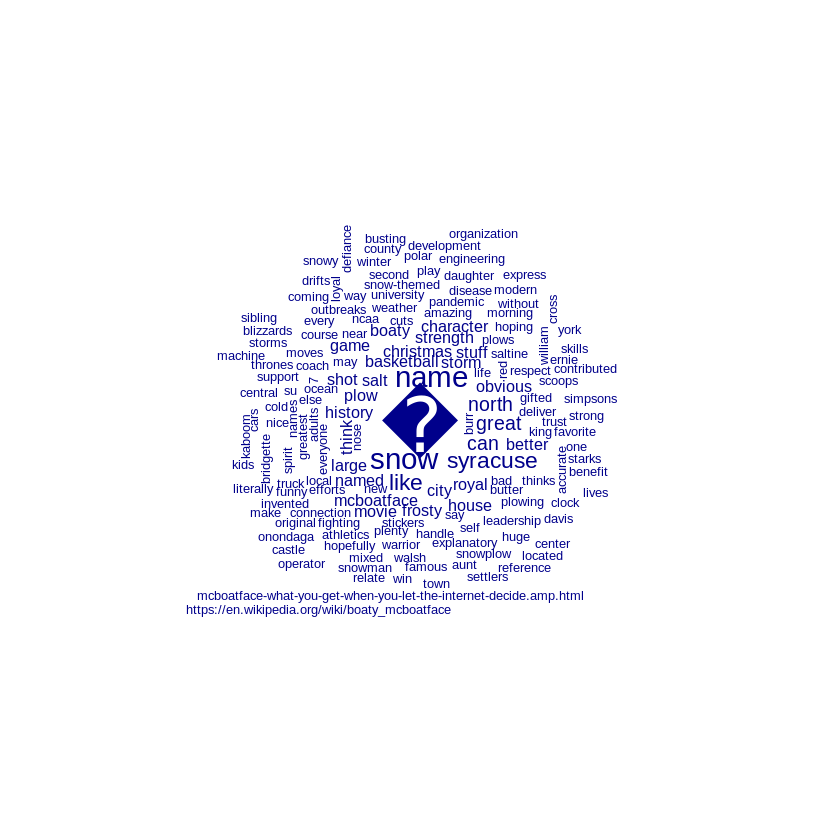

In [10]:
textplot_wordcloud(DFM, min_count = 1) #min_count determines the minimum frequency of each word in the cloud

We can now move on to a depper level of analysis, such as **sentiment analysis** to see whether our text data is more on the positive or negative opinion side. <br>
First, however, we need to **preprocess** the data a bit further by creating a list of the unique words in our corpus based on the DFM we created earlier, and then sort that list so the most frequently occurring words appear on top:

In [11]:
m <- as.matrix(DFM)
wordCounts <- colSums(m)
wordCounts <- sort(wordCounts, decreasing=TRUE) 
wordCounts

� 
                                                               20 
                                                             snow 
                                                                6 
                                                             name 
                                                                6 
                                                             like 
                                                                4 
                                                         syracuse 
                                                                4 
                                                              can 
                                                                3 
                                                            great 
                                                                3 
                                                            north 
                                                                3 
                                                            storm 
                                                                2 
                                                             salt 
                                                                2 
                                                             plow 
                                                                2 
                                                       basketball 
                                                                2 
                                                          history 
                                                                2 
                                                        christmas 
                                                                2 
                                                            think 
                                                                2 
                                                             city 
                                                                2 
                                                          obvious 
                                                                2 
                                                         strength 
                                                                2 
                                                            stuff 
                                                                2 
                                                            boaty 
                                                                2 
                                                       mcboatface 
                                                                2 
                                                            named 
                                                                2 
                                                           frosty 
                                                                2 
                                                        character 
                                                                2 
                                                             shot 
                                                                2 
                                                             game 
                                                                2 
                                                            large 
                                                                2 
                                                            royal 
                                                                2 
                                                            house 
                                                                2 
                                                            movie 
                                                                2 
                                            

We can see that after the strange character R cannot decipher (most likely an apostrophe (') that was encoded wrong), **""snow""** and **"name"** are the top words in our data, each appearing 6 times, etc. <br><br>
**Sentiment analysis** works by comparing these unique words in our data with a list of common positive words in the English language, followed by a similar list of common negative words. Thus, the next step in our analysis is to load these two lists into R. Here are the links to each of them:

https://ist387.s3.us-east-2.amazonaws.com/data/positive-words.txt

https://ist387.s3.us-east-2.amazonaws.com/data/negative-words.txt

In [16]:
posWords <- scan("https://ist387.s3.us-east-2.amazonaws.com/data/positive-words.txt", character(0), sep = "\n")
head(posWords,50)

[1] ";;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;"  
 [2] "; "                                                                            
 [3] "; Opinion Lexicon: Positive"                                                   
 [4] ";"                                                                             
 [5] "; This file contains a list of POSITIVE opinion words (or sentiment words)."   
 [6] ";"                                                                             
 [7] "; This file and the papers can all be downloaded from "                        
 [8] ";    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html"                  
 [9] ";"                                                                             
[10] "; If you use this list, please cite one of the following two papers:"          
[11] ";"                                                                             
[12] ";   Minqing Hu and Bing Liu. \"Mining and Summarizing Customer Reviews.\" "    
[13] ";       Proceedings of the ACM SIGKDD International Conference on Knowledge "  
[14] ";       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, "      
[15] ";       Washington, USA, "                                                     
[16] ";   Bing Liu, Minqing Hu and Junsheng Cheng. \"Opinion Observer: Analyzing "   
[17] ";       and Comparing Opinions on the Web.\" Proceedings of the 14th "         
[18] ";       International World Wide Web conference (WWW-2005), May 10-14, "       
[19] ";       2005, Chiba, Japan."                                                   
[20] ";"                                                                             
[21] "; Notes: "                                                                     
[22] ";    1. The appearance of an opinion word in a sentence does not necessarily  "
[23] ";       mean that the sentence expresses a positive or negative opinion. "     
[24] ";       See the paper below:"                                                  
[25] ";"                                                                             
[26] ";       Bing Liu. \"Sentiment Analysis and Subjectivity.\" An chapter in "     
[27] ";          Handbook of Natural Language Processing, Second Edition, "          
[28] ";          (editors: N. Indurkhya and F. J. Damerau), 2010."                   
[29] ";"                                                                             
[30] ";    2. You will notice many misspelled words in the list. They are not "      
[31] ";       mistakes. They are included as these misspelled words appear "         
[32] ";       frequently in social media content. "                                  
[33] ";"                                                                             
[34] ";;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;"  
[35] "a+"                                                                            
[36] "abound"                                                                        
[37] "abounds"                                                                       
[38] "abundance"                                                                     
[39] "abundant"                                                                      
[40] "accessable"                                                                    
[41] "accessible"                                                                    
[42] "acclaim"                                                                       
[43] "acclaimed"                                                                     
[44] "acclamation"                                                                   
[45] "accolade"                                                                      
[46] "accolades"                                                                     
[47] "accommodative"                         

We can see by printing the first 50 rows of the positive words list that the file starts with a meta data description of the list - we need to remove it by filtering out the first 34 rows in order to only keep the meaningful data:

In [17]:
posWords <- posWords[-1:-34]
head(posWords)
length(posWords)

[1] "a+"         "abound"     "abounds"    "abundance"  "abundant"  
[6] "accessable"

[1] 2006

We'll do the same with the list of negative words:

In [18]:
negWords <- scan("https://ist387.s3.us-east-2.amazonaws.com/data/negative-words.txt", character(0), sep = "\n")
negWords <- negWords[-1:-34]
length(negWords)

[1] 4783

Now that we have a clean list of the unique words in our data (**wordCounts**), as well as a list of positive words (**posWords**) and negative words (**negWords**), the next step is to compare **wordCounts** with **posWords** and **negWords**, respectively. This way, we can count, e.g. how many of the positive words in **posWords** appear in our text (**wordCounts**).The following code matches the words from **wordCounts** to the list of positive words, **posWords**:

In [19]:
matchedP <- match(names(wordCounts), posWords, nomatch = 0)

In [21]:
head(matchedP)
length(matchedP)

[1]    0    0    0 1088    0    0

[1] 161

**matchedP** is a vector of the same length as **wordCounts** = 161, because it checks each word in **wordCounts** to make sure if it's present in **posWords** (in which case it returns the **index** of that word in **posWords**) or not (if that's the case, it returns **0**). Following this logic, we can say that the first 3 words in **wordCounts** are **NOT** present in **posWords** but word #4 **IS** - it's word #1088 in **posWords**. Let's see which word that is in **wordCounts** and **posWords**, respectively, by using the word's indices in each vector: 

In [24]:
head(wordCounts)
wordCounts[4]
posWords[1088]

�     snow     name     like syracuse      can 
      20        6        6        4        4        3

like 
   4

[1] "like"

The following command allows us to print all the postivie words in **posWords** which are present in our data (**wordCounts**):

In [25]:
posWords[matchedP[matchedP != 0]]

[1] "like"     "great"    "better"   "amazing"  "respect"  "greatest"
 [7] "gifted"   "trust"    "support"  "accurate" "nice"     "famous"  
[13] "favorite" "win"      "strong"   "loyal"    "modern"   "benefit"

Let's count the total number of positive word matches:

In [27]:
sum(wordCounts[matchedP != 0])
wordCounts[matchedP != 0]

[1] 24

like    great   better  amazing  respect greatest   gifted    trust 
       4        3        2        1        1        1        1        1 
 support accurate     nice   famous favorite      win   strong    loyal 
       1        1        1        1        1        1        1        1 
  modern  benefit 
       1        1

In one step, this is the same procedure, but for the **negative words**:

In [28]:
matchedN <- match(names(wordCounts), negWords, nomatch = 0)
negWords[matchedN[matchedN != 0]]
wordCounts[matchedN != 0]
sum(wordCounts[matchedN != 0])

[1] "bad"      "funny"    "cold"     "defiance"

bad    funny     cold defiance 
       1        1        1        1

[1] 4

This simple analysis shows that there are more positive words in our corpus than negative, i.e. the sentiment is more positive.